In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as mn
pd.set_option('display.max_columns',100)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_df = pd.read_csv('BankChurners.csv')
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
bank_df.shape

(10127, 23)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
bank_df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [6]:
bank_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [11]:
bank_df.drop_duplicates(inplace = True)

In [14]:
bank_df.shape

(10127, 23)

In [15]:
missing_data = pd.DataFrame({'total_missing': bank_df.isnull().sum(), 'percentage_missing': (bank_df.isnull().sum()/10127)*100})
missing_data

,total_missing,percentage_missing
CLIENTNUM,0,0.0
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Gender,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0
Marital_Status,0,0.0
Income_Category,0,0.0
Card_Category,0,0.0
Months_on_book,0,0.0


<AxesSubplot:>

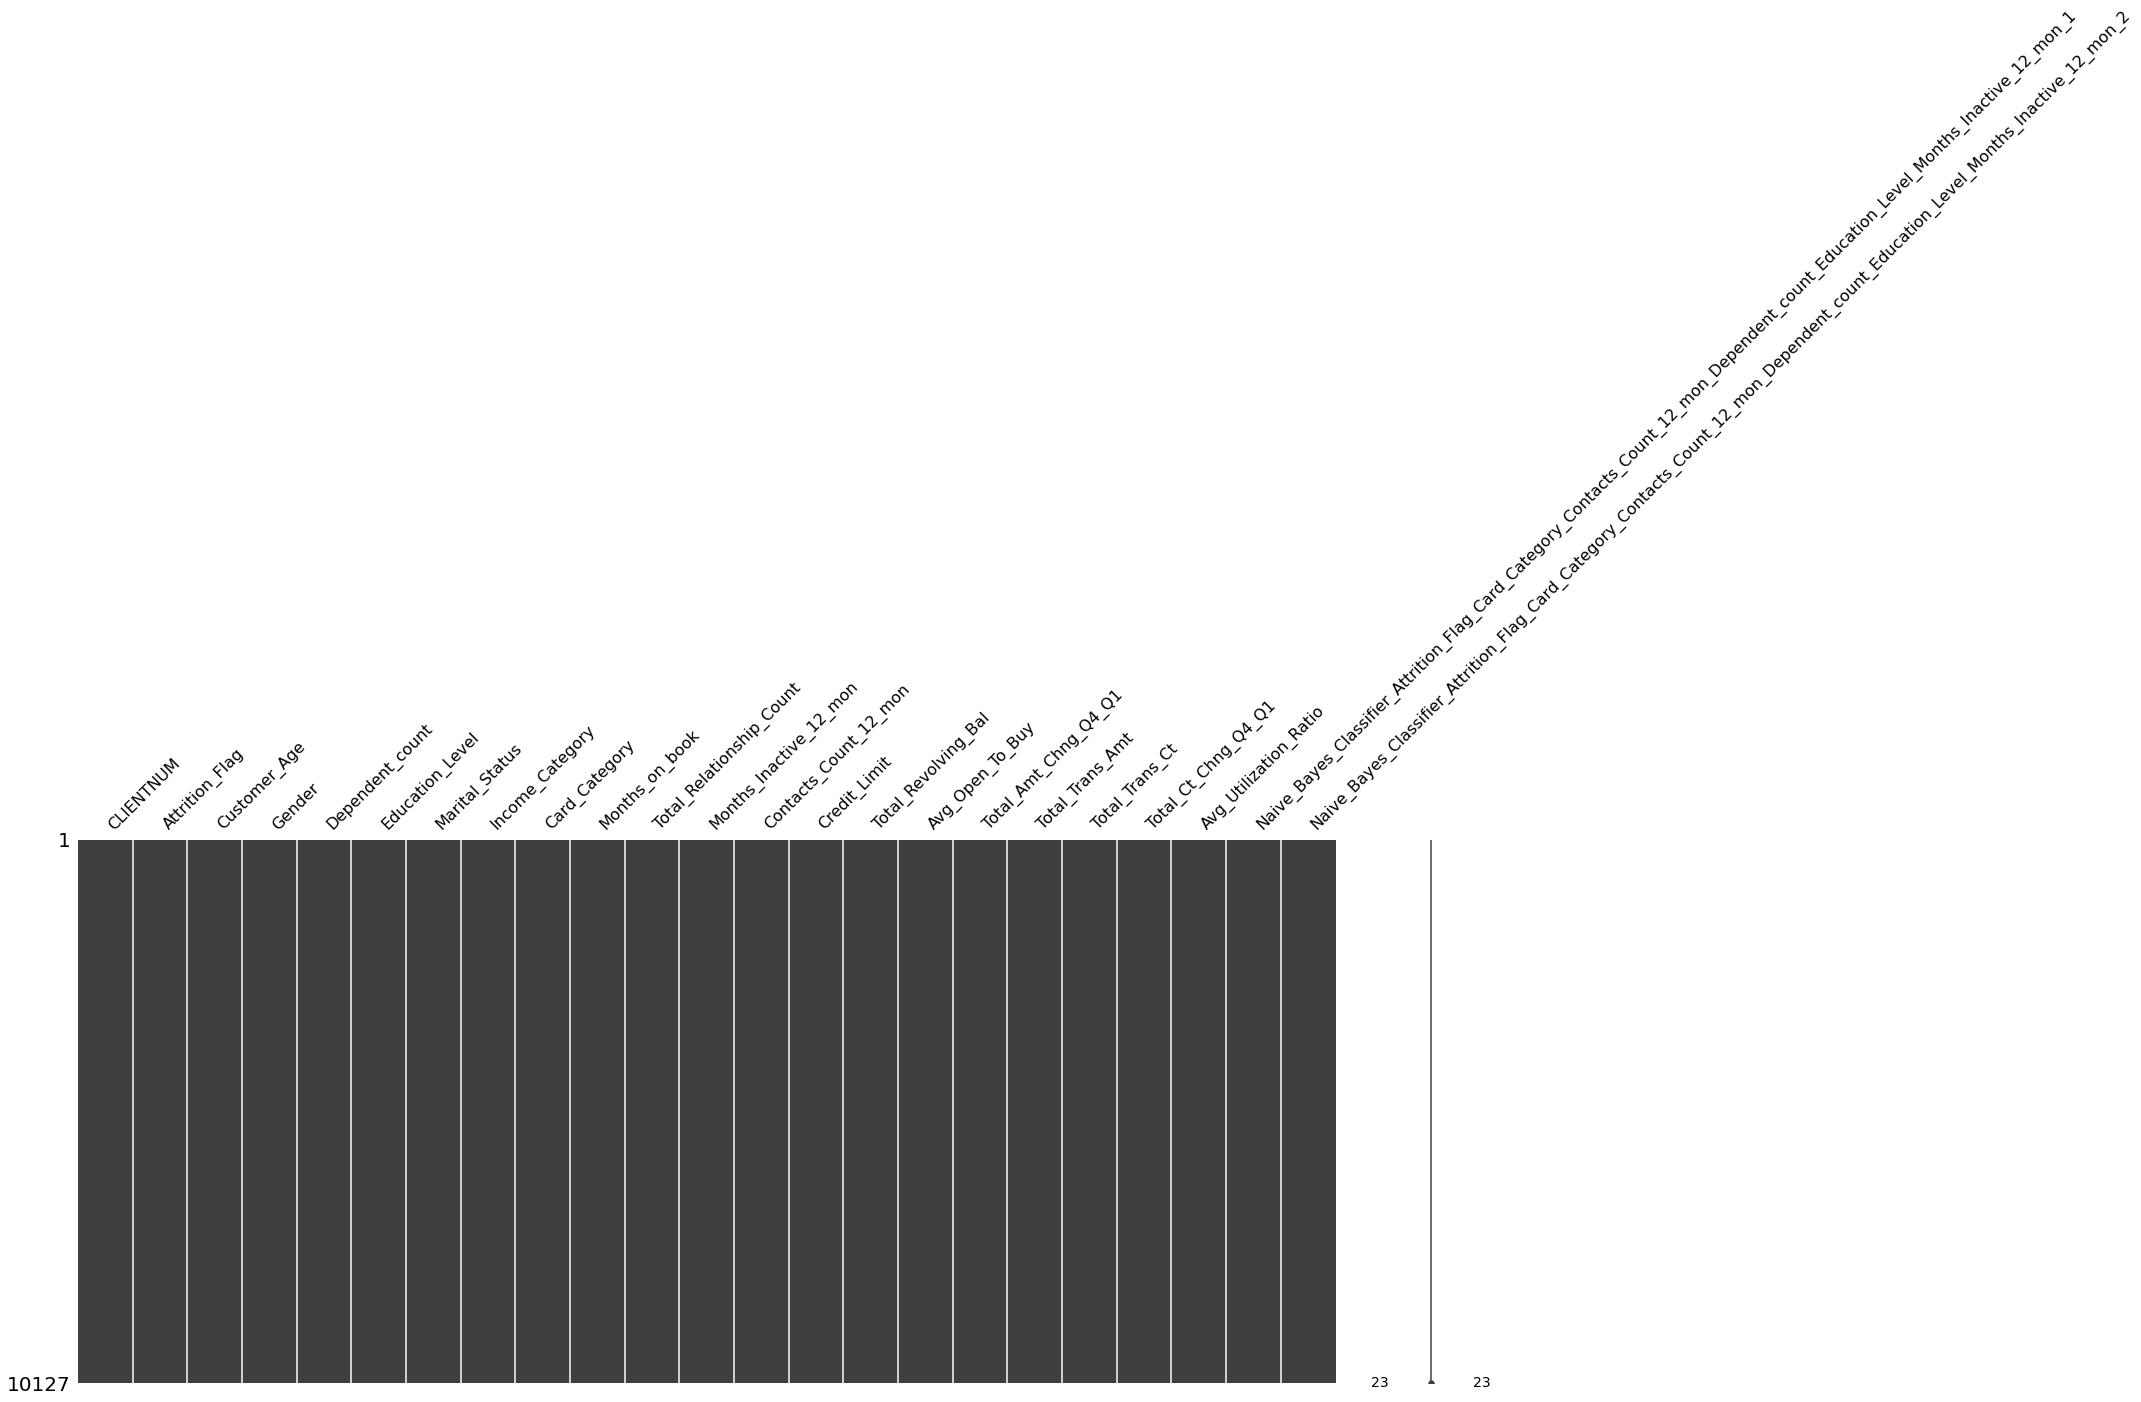

In [16]:
mn.matrix(bank_df)

In [18]:
bank_df.select_dtypes(['int64','float64']).columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [19]:
bank_df.select_dtypes(['object']).columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [20]:
bank_df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [21]:
bank_df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [22]:
bank_df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [24]:
bank_df['Education_Level'].replace('Unknown', bank_df['Education_Level'].mode()[0], inplace=True)

In [25]:
bank_df['Education_Level'].value_counts()

Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [26]:
bank_df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [27]:
bank_df['Marital_Status'].replace('Unknown',bank_df['Marital_Status'].mode()[0],inplace= True)

In [28]:
bank_df['Marital_Status'].value_counts()

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [29]:
bank_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [30]:
bank_df['Income_Category'].replace('Unknown',bank_df['Income_Category'].mode()[0],inplace=True)

In [31]:
bank_df['Income_Category'].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [33]:
bank_df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [34]:
bank_df['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)
bank_df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [35]:
bank_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)


In [36]:
bank_df.shape

(10127, 21)

# Outliers

In [38]:
num_cols_df=bank_df.select_dtypes(['float64','int64'])
num_cols_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


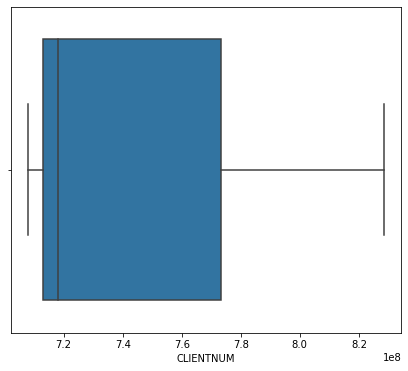

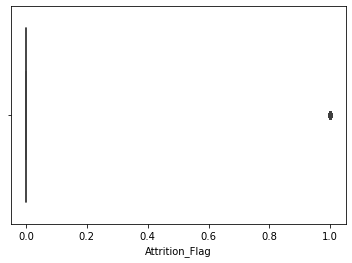

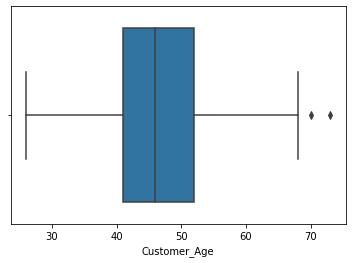

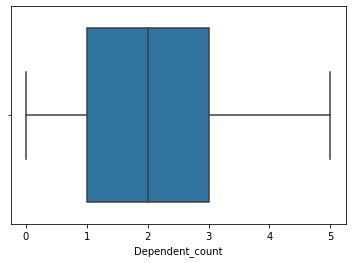

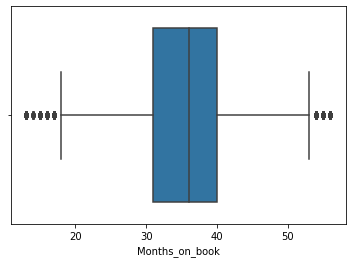

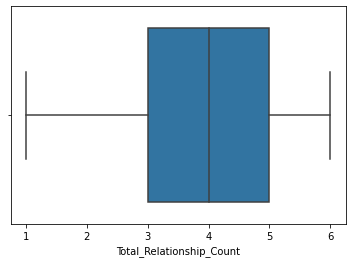

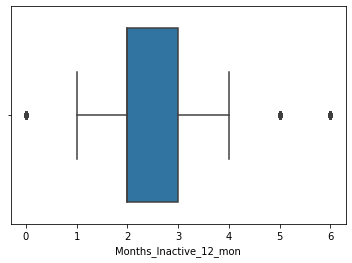

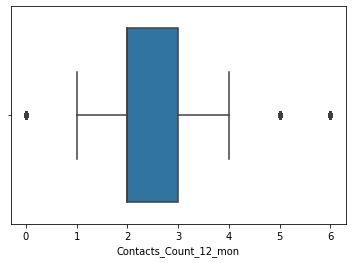

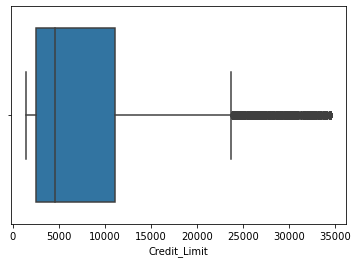

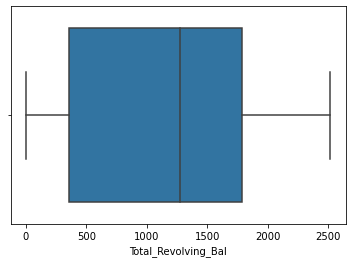

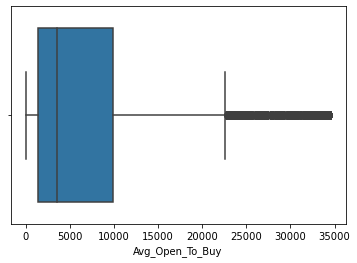

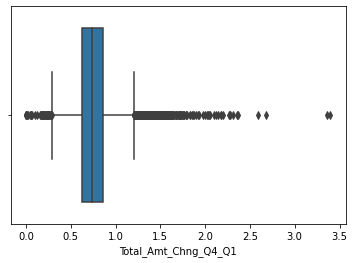

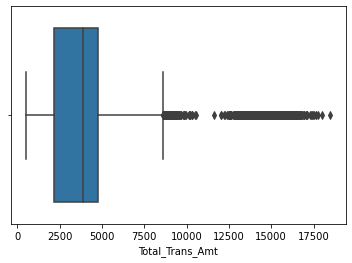

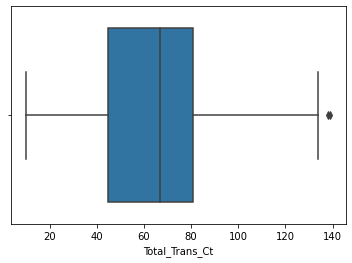

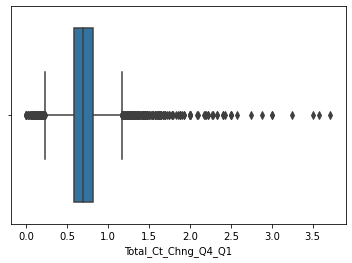

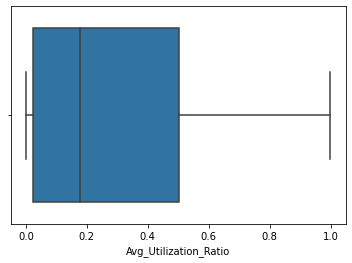

In [39]:
plt.figure(figsize=[7,6])
num_cols = num_cols_df.columns
for i in range(len(num_cols)):
    sns.boxplot(bank_df[num_cols[i]])
    plt.show()

there are outliers in columns :'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'

In [40]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    LTV = q25-(1.5*IQR)
    UTV = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> UTV else y).apply(lambda y: q5 if y < LTV else y)

In [41]:
outlier_list = ['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

In [42]:
for i in bank_df[outlier_list]:
    bank_df[i]=treat_outlier(bank_df[i])

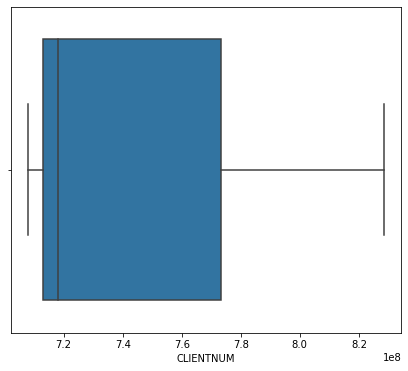

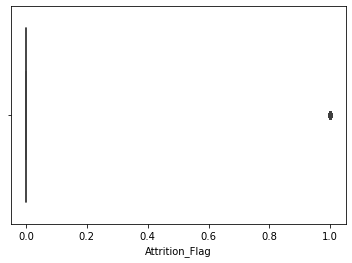

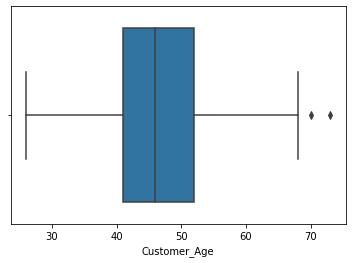

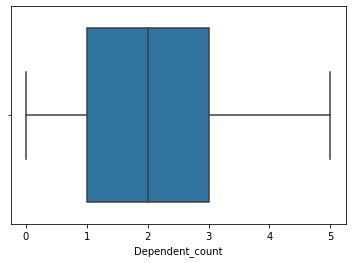

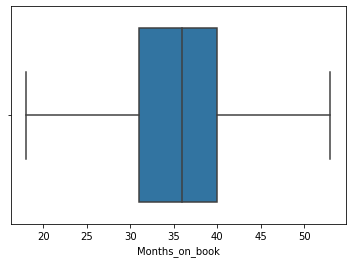

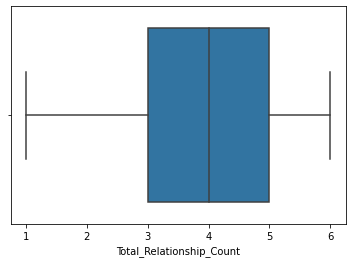

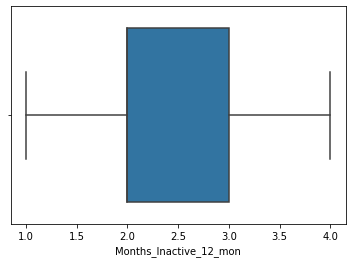

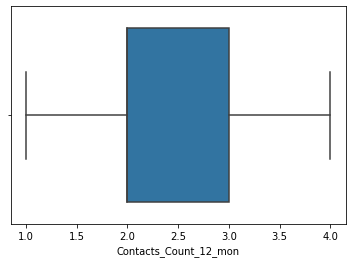

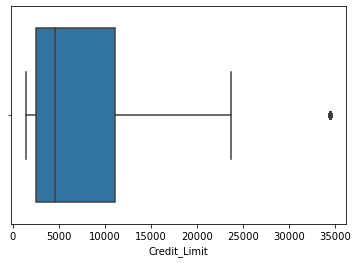

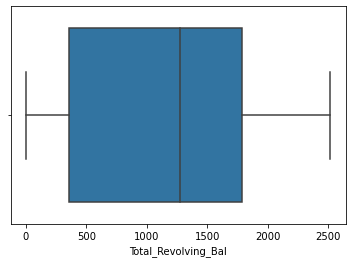

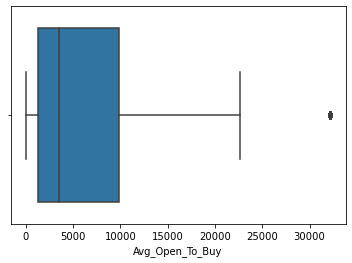

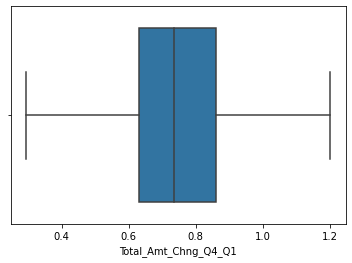

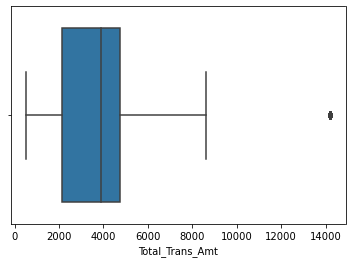

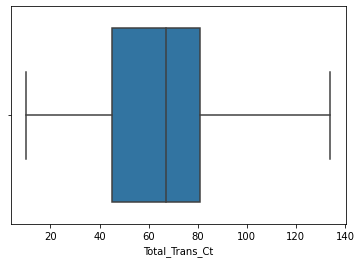

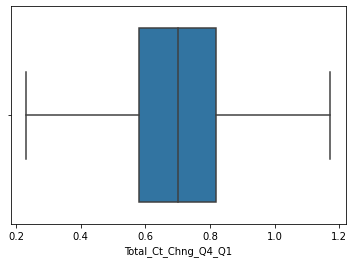

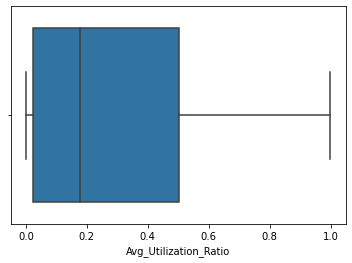

In [43]:
plt.figure(figsize=[7,6])
num_cols = num_cols_df.columns
for i in range(len(num_cols)):
    sns.boxplot(bank_df[num_cols[i]])
    plt.show()

In [50]:
bank_df['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)
bank_df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

# Churn & NonChurn

In [51]:
Churn=bank_df[bank_df['Attrition_Flag']== 1]
Churn.shape

(1627, 21)

In [52]:
Churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,1,62,F,0,Graduate,Married,Less than $40K,Blue,49.0,2,3.0,3.0,1438.3,0,1438.3,1.047,692.0,16.0,0.600,0.000
39,708300483,1,66,F,0,Doctorate,Married,Less than $40K,Blue,50.0,5,4.0,3.0,7882.0,605,7277.0,1.052,704.0,16.0,0.368,0.077
51,779471883,1,54,F,1,Graduate,Married,Less than $40K,Blue,40.0,2,3.0,1.0,1438.3,808,630.3,0.997,705.0,19.0,0.900,0.562
54,714374133,1,56,M,2,Graduate,Married,$120K +,Blue,36.0,1,3.0,3.0,15769.0,0,15769.0,1.041,602.0,15.0,0.364,0.000
61,712030833,1,48,M,2,Graduate,Married,$60K - $80K,Silver,35.0,2,4.0,4.0,34516.0,0,32183.4,0.763,691.0,15.0,0.500,0.000


In [53]:
NonChurn=bank_df[bank_df['Attrition_Flag']== 0]
NonChurn.shape

(8500, 21)

In [54]:
NonChurn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1.0,3.0,12691.0,777,11914.0,1.103,1144.0,42.0,1.069,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1.0,2.0,8256.0,864,7392.0,1.103,1291.0,33.0,1.069,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1.0,1.0,3418.0,0,3418.0,1.103,1887.0,20.0,1.069,0.000
3,769911858,0,40,F,4,High School,Married,Less than $40K,Blue,34.0,3,4.0,1.0,3313.0,2517,796.0,1.103,1171.0,20.0,1.069,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1.0,1.0,4716.0,0,4716.0,1.103,816.0,28.0,1.069,0.000


In [55]:
Churn['Gender'].value_counts()

F    930
M    697
Name: Gender, dtype: int64

In [56]:
NonChurn['Gender'].value_counts()

F    4428
M    4072
Name: Gender, dtype: int64

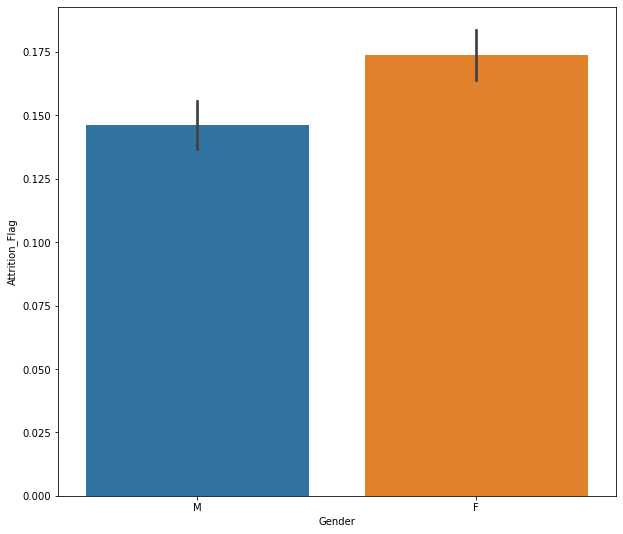

In [66]:
plt.figure(figsize=(10,9))
sns.barplot(x='Gender',y='Attrition_Flag',data=bank_df)
plt.show()

Women seems to churn more than men

# Customer_Age & Age group

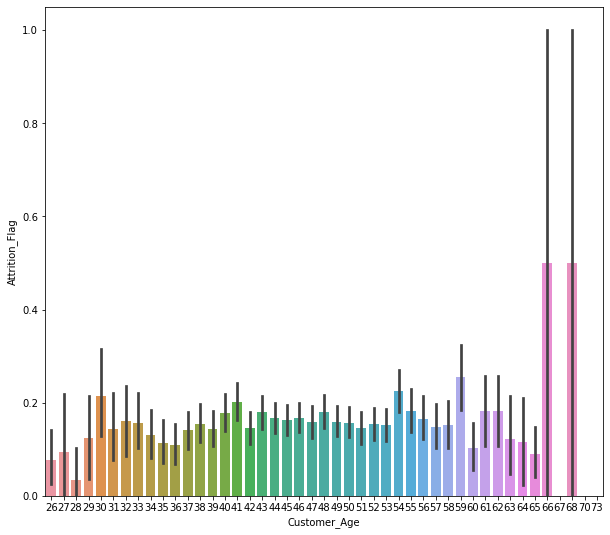

In [63]:
plt.figure(figsize=(10,9))
sns.barplot(x='Customer_Age',y='Attrition_Flag',data=bank_df)
plt.show()

In [67]:
def Age_Group(x):
    if x>=20 and x<30:
        return 30
    elif x>=30 and x<40:
        return 40
    elif x>=40 and x<50:
        return 50
    else:
        return 60

bank_df['Age_Group']=bank_df['Customer_Age'].apply(Age_Group)

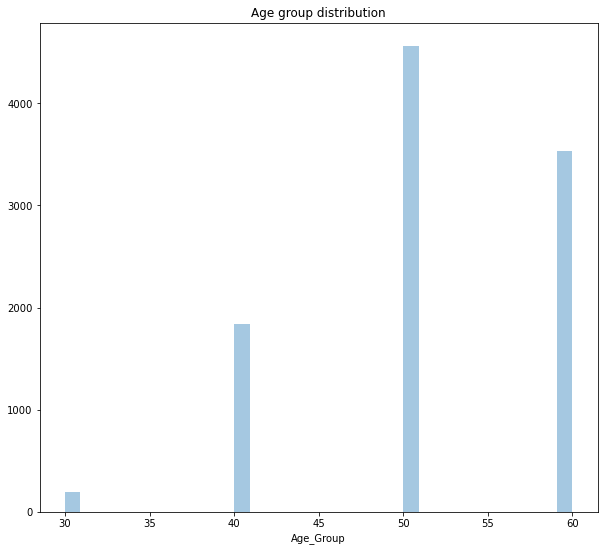

In [71]:
plt.figure(figsize=(10,9))
sns.distplot(bank_df.Age_Group, hist=True, kde=False)
plt.title("Age group distribution")
plt.show()

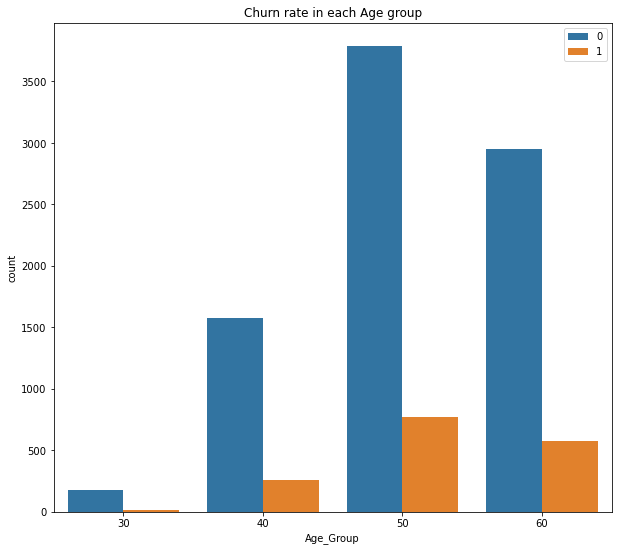

In [73]:
plt.figure(figsize=(10,9))
sns.countplot('Age_Group', hue = 'Attrition_Flag', data = bank_df)
plt.title("Churn rate in each Age group")
plt.legend()
plt.show()

customers above 40 tend to churn more

# Months_Inactive_12_mon

In [74]:
bank_df['Months_Inactive_12_mon'].value_counts()

3.0    3846
2.0    3282
1.0    2262
4.0     737
Name: Months_Inactive_12_mon, dtype: int64

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

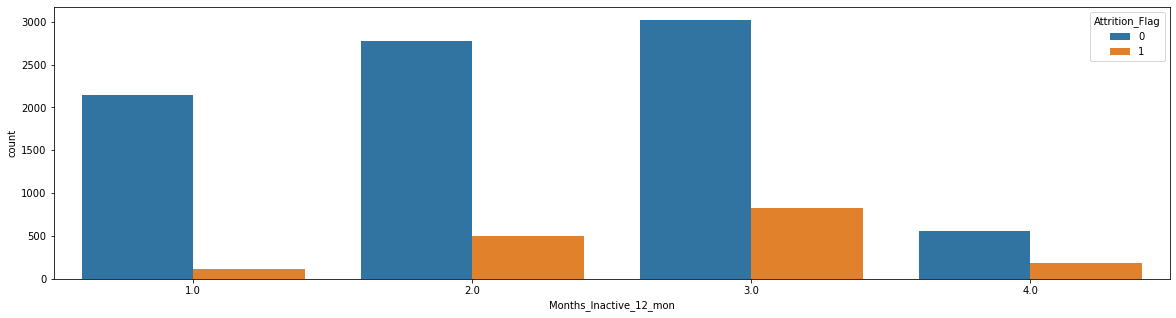

In [76]:
plt.figure(figsize = (20,5))
sns.countplot('Months_Inactive_12_mon', hue = 'Attrition_Flag', data = bank_df)

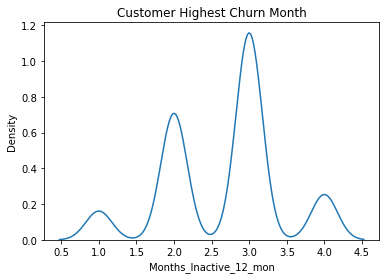

In [79]:
plt.figure(figsize=(6,4))
plt.title('Customer Highest Churn Month')
sns.distplot(Churn.Months_Inactive_12_mon,hist=False)
plt.show()

Customers churn more when they remain inactive for 3 months

In [80]:
bank_df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

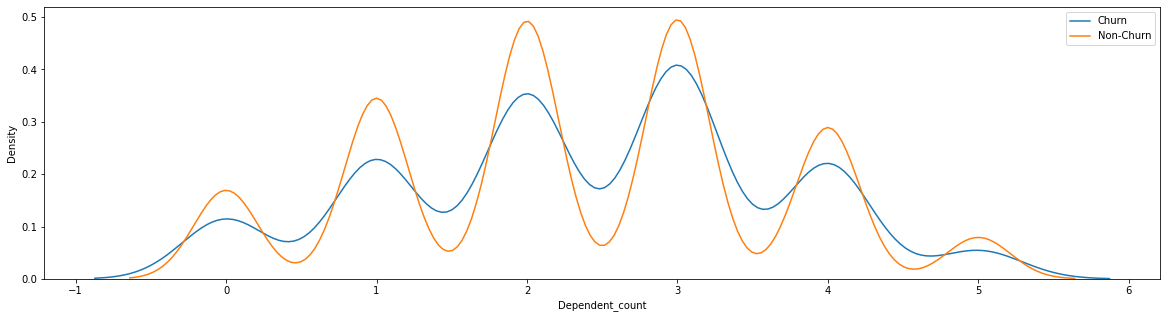

In [81]:
plt.figure(figsize = (20,5))
sns.distplot(Churn.Dependent_count, hist = False, label = 'Churn')
sns.distplot(NonChurn.Dependent_count, hist = False, label  = 'Non-Churn')
plt.legend()
plt.show()

Customers churn more when they have dependent count more than 3 as compared to non churn customers

# Credit Limit

In [83]:
bank_df['Credit_Limit'].describe()

count    10127.000000
mean      8920.017883
std       9757.426497
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [84]:
Churn['Credit_Limit'].describe()

count     1627.000000
mean      8403.644253
std       9729.326618
min       1438.300000
25%       2114.000000
50%       4178.000000
75%       9933.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [85]:
NonChurn['Credit_Limit'].describe()

count     8500.000000
mean      9018.857871
std       9760.252018
min       1438.300000
25%       2602.000000
50%       4643.500000
75%      11252.750000
max      34516.000000
Name: Credit_Limit, dtype: float64

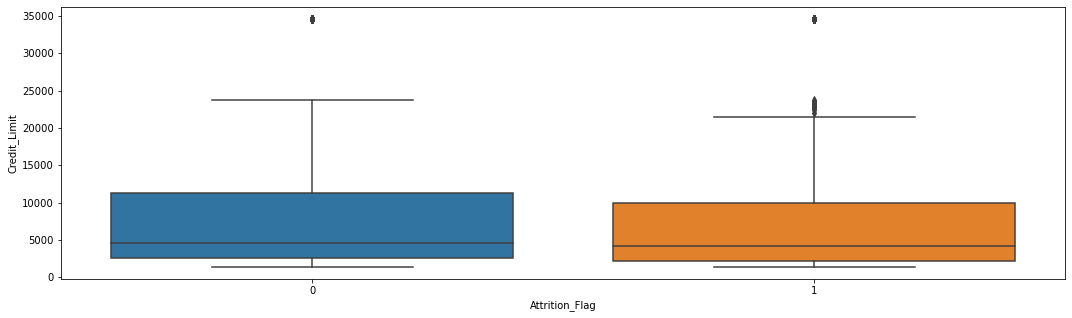

In [86]:
plt.figure(figsize = (18,5))
sns.boxplot(x = bank_df['Attrition_Flag'], y =bank_df['Credit_Limit'] )
plt.show()

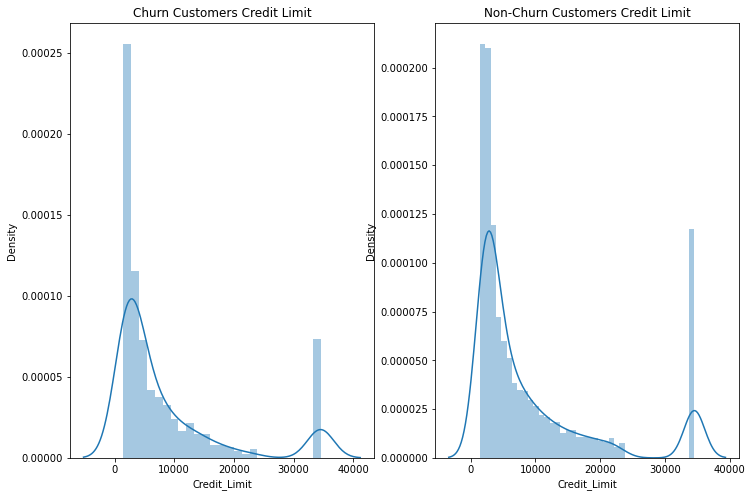

In [87]:
plt.figure(figsize = (12,8))


plt.subplot(1,2,1)
plt.title("Churn Customers Credit Limit")
sns.distplot(Churn.Credit_Limit)


plt.subplot(1,2,2)
plt.title("Non-Churn Customers Credit Limit")
sns.distplot(NonChurn.Credit_Limit)
plt.show()

Customers who have higher credit limit churn less 

# Total_Revolving_Bal

In [88]:
Churn['Total_Revolving_Bal'].describe()

count    1627.000000
mean      672.822987
std       921.385582
min         0.000000
25%         0.000000
50%         0.000000
75%      1303.500000
max      2517.000000
Name: Total_Revolving_Bal, dtype: float64

In [89]:
NonChurn['Total_Revolving_Bal'].describe()

count    8500.000000
mean     1256.604118
std       757.745354
min         0.000000
25%       800.000000
50%      1364.000000
75%      1807.000000
max      2517.000000
Name: Total_Revolving_Bal, dtype: float64

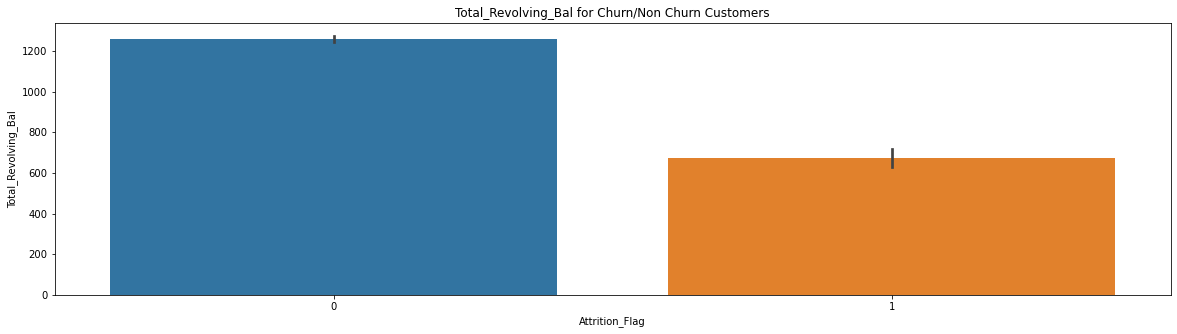

In [90]:
plt.figure(figsize = (20,5))
sns.barplot(y='Total_Revolving_Bal',x='Attrition_Flag',data=bank_df)
plt.title('Total_Revolving_Bal for Churn/Non Churn Customers')
plt.show()

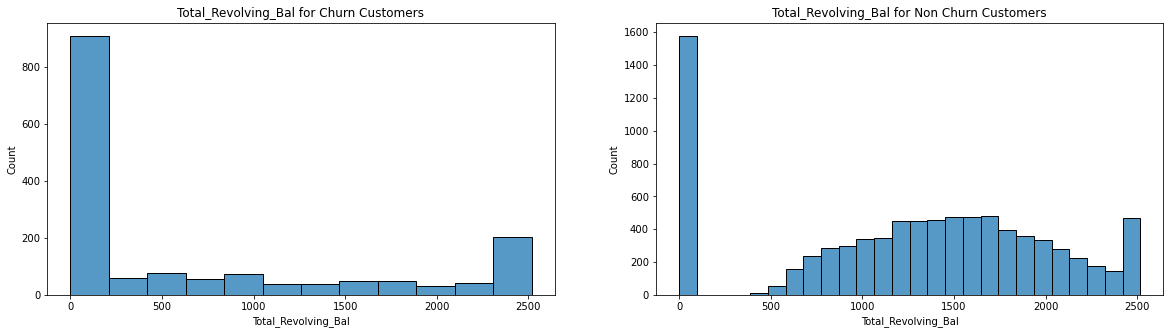

In [91]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Total_Revolving_Bal for Churn Customers')
sns.histplot(Churn.Total_Revolving_Bal)

plt.subplot(1,2,2)
plt.title('Total_Revolving_Bal for Non Churn Customers')
sns.histplot(NonChurn.Total_Revolving_Bal)
plt.show()

In [92]:
best_score=Churn[Churn.Total_Revolving_Bal<0.3*Churn.Credit_Limit]
best_score.shape

(1278, 21)

out of 1600 (approx) Churn customers,  1278 have best score ie revolving balance<Credt_Limit . which means only few have higher revolving balance

Observations:

1. Revolving balance is less for Churn Customers and is maintained well

2. On an average, revolving balance for Churn is 672 which is half of Non Churn Customers

# Total_Amt_Chng_Q4_Q1

In [95]:
bank_df['Total_Amt_Chng_Q4_Q1'].describe()

count    10127.000000
mean         0.748844
std          0.175304
min          0.293000
25%          0.631000
50%          0.736000
75%          0.859000
max          1.201000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

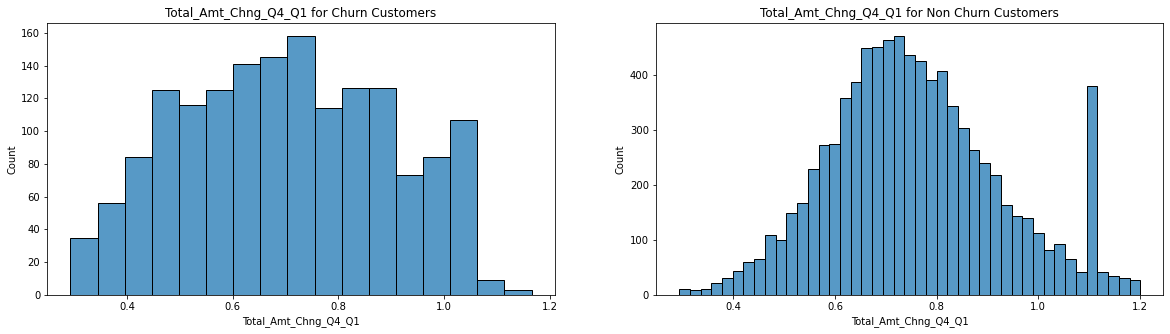

In [96]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Total_Amt_Chng_Q4_Q1 for Churn Customers')
sns.histplot(Churn.Total_Amt_Chng_Q4_Q1)

plt.subplot(1,2,2)
plt.title('Total_Amt_Chng_Q4_Q1 for Non Churn Customers')
sns.histplot(NonChurn.Total_Amt_Chng_Q4_Q1)
plt.show()

Thus,change in expenditure increases for Q4 when compared with Q1 quarter for Churn Customers

# Total_Trans_Amt

In [97]:
Churn['Total_Trans_Amt'].describe()

count     1627.000000
mean      3362.758451
std       3142.132537
min        510.000000
25%       1903.500000
50%       2329.000000
75%       2772.000000
max      14212.000000
Name: Total_Trans_Amt, dtype: float64

In [98]:
NonChurn['Total_Trans_Amt'].describe()

count     8500.000000
mean      4649.980235
std       3453.638661
min        816.000000
25%       2384.750000
50%       4100.000000
75%       4781.250000
max      14212.000000
Name: Total_Trans_Amt, dtype: float64

In [99]:
Churn['Credit_Limit'].describe()

count     1627.000000
mean      8403.644253
std       9729.326618
min       1438.300000
25%       2114.000000
50%       4178.000000
75%       9933.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

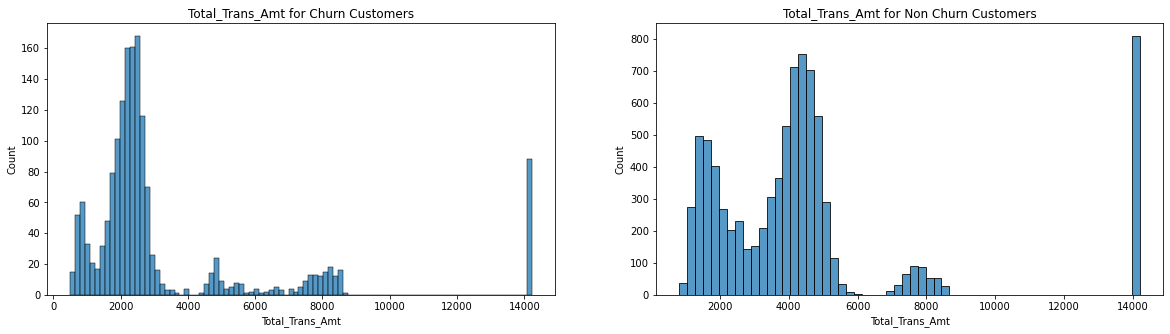

In [100]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Total_Trans_Amt for Churn Customers')
sns.histplot(Churn.Total_Trans_Amt)

plt.subplot(1,2,2)
plt.title('Total_Trans_Amt for Non Churn Customers')
sns.histplot(NonChurn.Total_Trans_Amt)
plt.show()

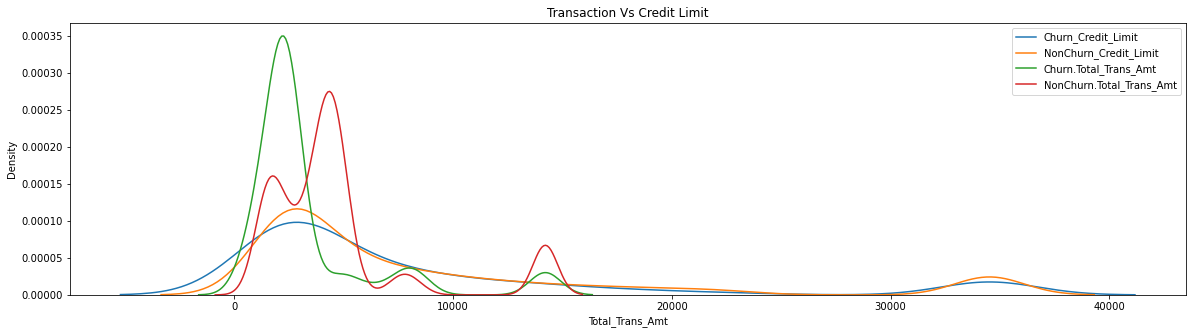

In [101]:
plt.figure(figsize = (20,5))
sns.distplot(Churn.Credit_Limit, hist = False, label = 'Churn_Credit_Limit')
sns.distplot(NonChurn.Credit_Limit, hist = False, label  = 'NonChurn_Credit_Limit')
sns.distplot(Churn.Total_Trans_Amt, hist = False, label = 'Churn.Total_Trans_Amt')
sns.distplot(NonChurn.Total_Trans_Amt, hist = False, label  = 'NonChurn.Total_Trans_Amt')
plt.title('Transaction Vs Credit Limit')
plt.legend()
plt.show()

Total Transaction amount of Churn Customers is less than Non Churn Customers as credit limit is low

# Total_Trans_Ct

In [102]:
Churn['Total_Trans_Ct'].describe()

count    1627.000000
mean       44.933620
std        14.568429
min        10.000000
25%        37.000000
50%        43.000000
75%        51.000000
max        94.000000
Name: Total_Trans_Ct, dtype: float64

In [103]:
NonChurn['Total_Trans_Ct'].describe()

count    8500.000000
mean       68.664706
std        22.900745
min        11.000000
25%        54.000000
50%        71.000000
75%        82.000000
max       134.000000
Name: Total_Trans_Ct, dtype: float64

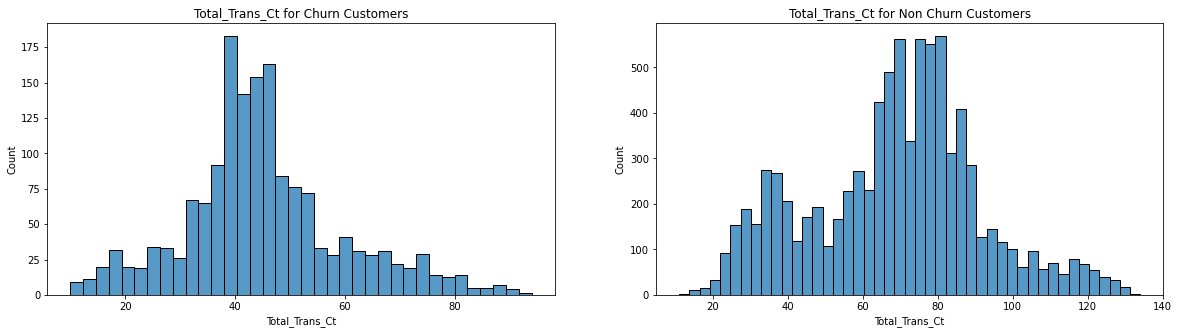

In [104]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Total_Trans_Ct for Churn Customers')
sns.histplot(Churn.Total_Trans_Ct)

plt.subplot(1,2,2)
plt.title('Total_Trans_Ct for Non Churn Customers')
sns.histplot(NonChurn.Total_Trans_Ct)
plt.show()

Total Transaction count for Churn Customers on an avg is '44' and for Non Churn it '68'

# Total_Ct_Chng_Q4_Q1

In [105]:
Churn['Total_Ct_Chng_Q4_Q1'].describe()

count    1627.000000
mean        0.561535
std         0.197191
min         0.231000
25%         0.400000
50%         0.531000
75%         0.692000
max         1.167000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

In [106]:
NonChurn['Total_Ct_Chng_Q4_Q1'].describe()

count    8500.000000
mean        0.728625
std         0.173525
min         0.231000
25%         0.617000
50%         0.721000
75%         0.833000
max         1.172000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

# Avg_Utilization_Ratio

In [107]:
Churn['Avg_Utilization_Ratio'].describe()

count    1627.000000
mean        0.162475
std         0.264458
min         0.000000
25%         0.000000
50%         0.000000
75%         0.231000
max         0.999000
Name: Avg_Utilization_Ratio, dtype: float64

In [108]:
NonChurn['Avg_Utilization_Ratio'].describe()

count    8500.000000
mean        0.296412
std         0.272568
min         0.000000
25%         0.055000
50%         0.211000
75%         0.529250
max         0.994000
Name: Avg_Utilization_Ratio, dtype: float64

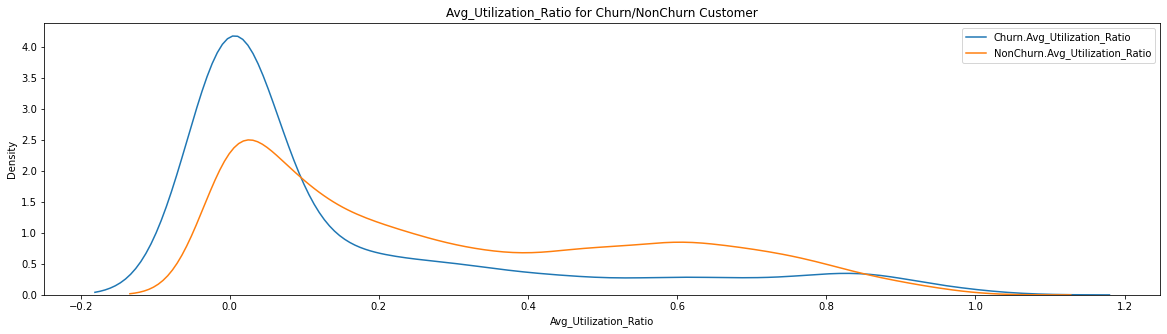

In [109]:
plt.figure(figsize = (20,5))
sns.distplot(Churn.Avg_Utilization_Ratio, hist = False, label = 'Churn.Avg_Utilization_Ratio')
sns.distplot(NonChurn.Avg_Utilization_Ratio, hist = False, label  = 'NonChurn.Avg_Utilization_Ratio')
plt.title('Avg_Utilization_Ratio for Churn/NonChurn Customer')
plt.legend()
plt.show()

Average Utilization ratio for Churn Customers is less than Non Churn Customers

# Education Level 

In [111]:
dummy=pd.get_dummies(bank_df[['Education_Level']],drop_first=True)

bank_df=pd.concat([bank_df,dummy],axis=1)

In [112]:
bank_df.drop(['Education_Level'],axis=1,inplace=True)

In [113]:
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated
0,768805383,0,45,M,3,Married,$60K - $80K,Blue,39.0,5,1.0,3.0,12691.0,777,11914.0,1.103,1144.0,42.0,1.069,0.061,50,0,0,1,0,0
1,818770008,0,49,F,5,Single,Less than $40K,Blue,44.0,6,1.0,2.0,8256.0,864,7392.0,1.103,1291.0,33.0,1.069,0.105,50,0,1,0,0,0
2,713982108,0,51,M,3,Married,$80K - $120K,Blue,36.0,4,1.0,1.0,3418.0,0,3418.0,1.103,1887.0,20.0,1.069,0.000,60,0,1,0,0,0
3,769911858,0,40,F,4,Married,Less than $40K,Blue,34.0,3,4.0,1.0,3313.0,2517,796.0,1.103,1171.0,20.0,1.069,0.760,50,0,0,1,0,0
4,709106358,0,40,M,3,Married,$60K - $80K,Blue,21.0,5,1.0,1.0,4716.0,0,4716.0,1.103,816.0,28.0,1.069,0.000,50,0,0,0,0,1


In [114]:
Education=bank_df.loc[:,bank_df.columns.str.startswith('Education')].columns
Education

Index(['Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated'],
      dtype='object')

In [116]:
Churn=bank_df[bank_df['Attrition_Flag']== 1]
Churn.shape

(1627, 26)

In [117]:
NonChurn=bank_df[bank_df['Attrition_Flag']== 0]
NonChurn.shape

(8500, 26)

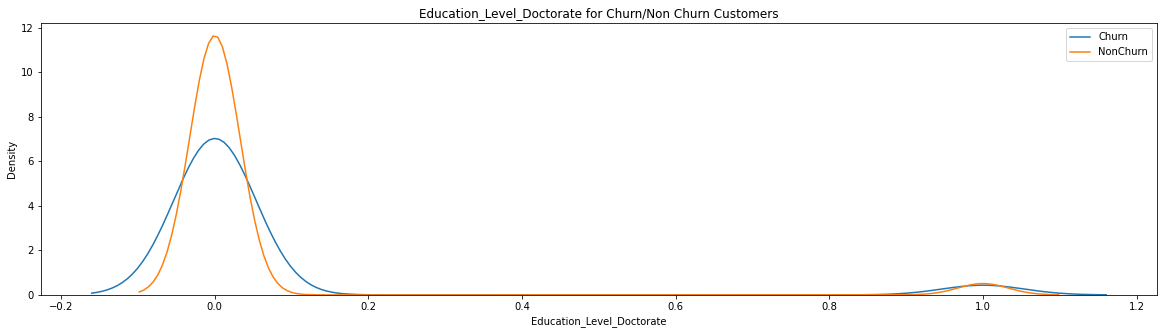

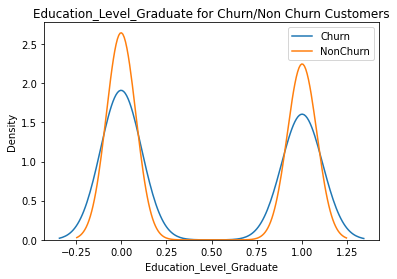

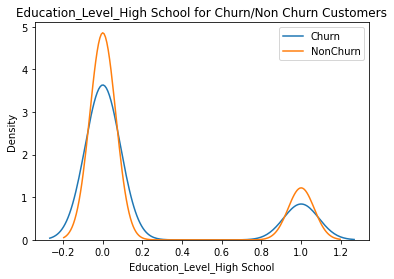

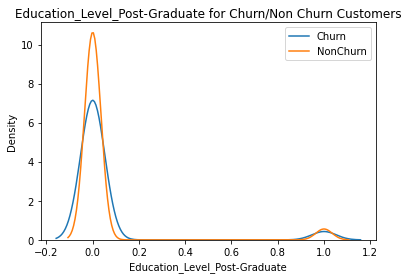

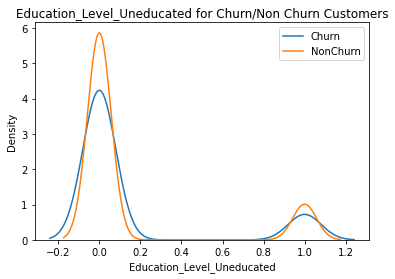

In [118]:
plt.figure(figsize = (20,5))
for i in range(len(Education)):
    sns.distplot(Churn[Education[i]], hist = False, label = 'Churn')
    sns.distplot(NonChurn[Education[i]], hist = False, label  = 'NonChurn')
    plt.title("{} for Churn/Non Churn Customers".format(Education[i]))
    plt.legend()
    plt.show()

In [120]:
Churn['Education_Level_Uneducated'].value_counts()

0    1390
1     237
Name: Education_Level_Uneducated, dtype: int64

In [121]:
Churn['Education_Level_Post-Graduate'].value_counts()

0    1535
1      92
Name: Education_Level_Post-Graduate, dtype: int64

In [122]:
Churn['Education_Level_High School'].value_counts()

0    1321
1     306
Name: Education_Level_High School, dtype: int64

In [123]:
Churn['Education_Level_Graduate'].value_counts()

0    884
1    743
Name: Education_Level_Graduate, dtype: int64

In [124]:
Churn['Education_Level_Doctorate'].value_counts()

0    1532
1      95
Name: Education_Level_Doctorate, dtype: int64

Customers churn is higher for Education_Level_Graduate

In [125]:
Marital=bank_df.loc[:,bank_df.columns.str.startswith('Marital')].columns
Marital

Index(['Marital_Status'], dtype='object')

# Marital Status

In [126]:
dummy=pd.get_dummies(bank_df[['Marital_Status']],drop_first=True)

bank_df=pd.concat([bank_df,dummy],axis=1)

In [127]:
bank_df.drop(['Marital_Status'],axis=1,inplace=True)

In [128]:
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single
0,768805383,0,45,M,3,$60K - $80K,Blue,39.0,5,1.0,3.0,12691.0,777,11914.0,1.103,1144.0,42.0,1.069,0.061,50,0,0,1,0,0,1,0
1,818770008,0,49,F,5,Less than $40K,Blue,44.0,6,1.0,2.0,8256.0,864,7392.0,1.103,1291.0,33.0,1.069,0.105,50,0,1,0,0,0,0,1
2,713982108,0,51,M,3,$80K - $120K,Blue,36.0,4,1.0,1.0,3418.0,0,3418.0,1.103,1887.0,20.0,1.069,0.000,60,0,1,0,0,0,1,0
3,769911858,0,40,F,4,Less than $40K,Blue,34.0,3,4.0,1.0,3313.0,2517,796.0,1.103,1171.0,20.0,1.069,0.760,50,0,0,1,0,0,1,0
4,709106358,0,40,M,3,$60K - $80K,Blue,21.0,5,1.0,1.0,4716.0,0,4716.0,1.103,816.0,28.0,1.069,0.000,50,0,0,0,0,1,1,0


In [130]:
Churn=bank_df[bank_df['Attrition_Flag']== 1]
Churn.shape

(1627, 27)

In [132]:
NonChurn=bank_df[bank_df['Attrition_Flag']== 0]
NonChurn.shape

(8500, 27)

In [134]:
Churn['Marital_Status_Married'].value_counts()


1    838
0    789
Name: Marital_Status_Married, dtype: int64

In [135]:
Churn['Marital_Status_Single'].value_counts()

0    959
1    668
Name: Marital_Status_Single, dtype: int64

In [137]:
Marital=bank_df.loc[:,bank_df.columns.str.startswith('Marital')].columns
Marital

Index(['Marital_Status_Married', 'Marital_Status_Single'], dtype='object')

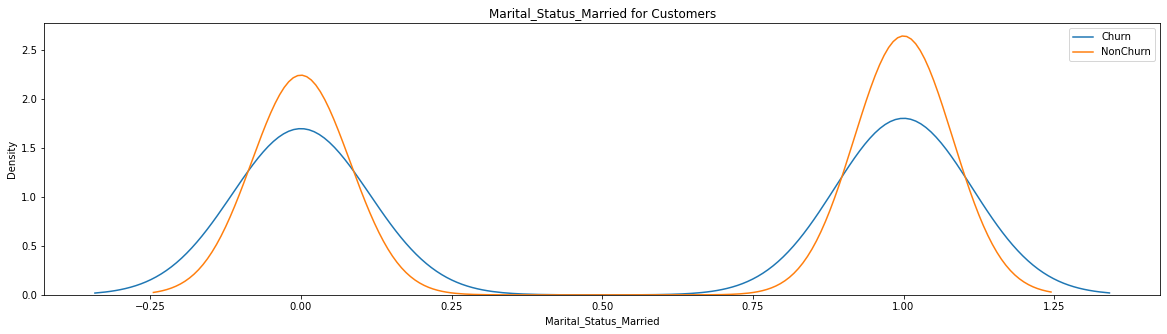

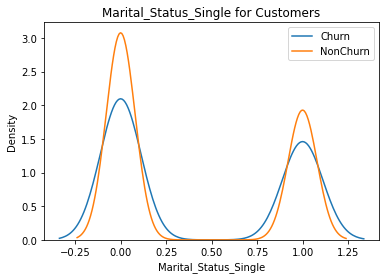

In [140]:
plt.figure(figsize = (20,5))
for i in range(len(Marital)):
    sns.distplot(Churn[Marital[i]], hist = False, label = 'Churn')
    sns.distplot(NonChurn[Marital[i]], hist = False, label  = 'NonChurn')
    plt.title("{} for Customers".format(Marital[i]))
    plt.legend()
    plt.show()

Churn Rate of Married Customers is more than Single Customers.Churn Rate is 51% for Married and for Single its 41%

# Income_Category

In [141]:
dummy=pd.get_dummies(bank_df[['Income_Category']],drop_first=True)

bank_df=pd.concat([bank_df,dummy],axis=1)

In [142]:
bank_df.drop(['Income_Category'],axis=1,inplace=True)

In [143]:
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K
0,768805383,0,45,M,3,Blue,39.0,5,1.0,3.0,12691.0,777,11914.0,1.103,1144.0,42.0,1.069,0.061,50,0,0,1,0,0,1,0,0,1,0,0
1,818770008,0,49,F,5,Blue,44.0,6,1.0,2.0,8256.0,864,7392.0,1.103,1291.0,33.0,1.069,0.105,50,0,1,0,0,0,0,1,0,0,0,1
2,713982108,0,51,M,3,Blue,36.0,4,1.0,1.0,3418.0,0,3418.0,1.103,1887.0,20.0,1.069,0.000,60,0,1,0,0,0,1,0,0,0,1,0
3,769911858,0,40,F,4,Blue,34.0,3,4.0,1.0,3313.0,2517,796.0,1.103,1171.0,20.0,1.069,0.760,50,0,0,1,0,0,1,0,0,0,0,1
4,709106358,0,40,M,3,Blue,21.0,5,1.0,1.0,4716.0,0,4716.0,1.103,816.0,28.0,1.069,0.000,50,0,0,0,0,1,1,0,0,1,0,0


In [144]:
Churn=bank_df[bank_df['Attrition_Flag']== 1]
Churn.shape

(1627, 30)

In [145]:
NonChurn=bank_df[bank_df['Attrition_Flag']== 0]
NonChurn.shape

(8500, 30)

In [147]:
Income_Category=bank_df.loc[:,bank_df.columns.str.startswith('Income_Category')].columns
Income_Category

Index(['Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K'],
      dtype='object')

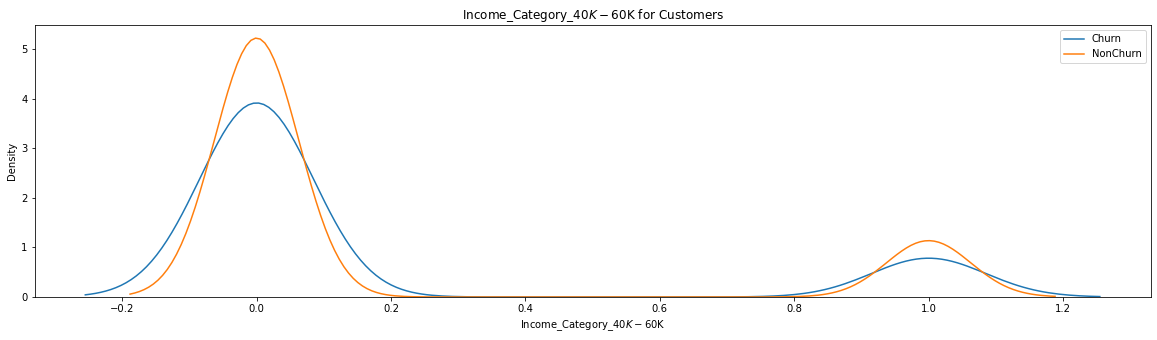

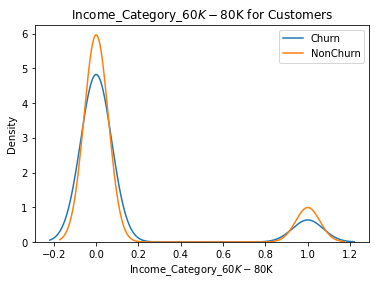

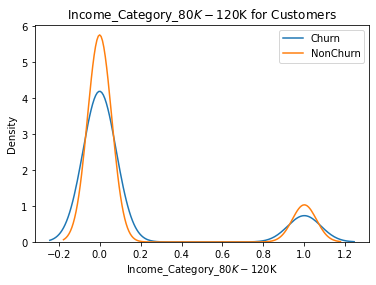

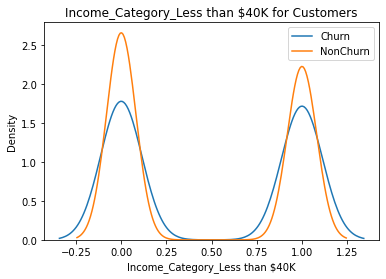

In [148]:
plt.figure(figsize = (20,5))
for i in range(len(Income_Category)):
    sns.distplot(Churn[Income_Category[i]], hist = False, label = 'Churn')
    sns.distplot(NonChurn[Income_Category[i]], hist = False, label  = 'NonChurn')
    plt.title("{} for Customers".format(Income_Category[i]))
    plt.legend()
    plt.show()

In [149]:
Churn['Income_Category_$40K - $60K'].value_counts()

0    1356
1     271
Name: Income_Category_$40K - $60K, dtype: int64

In [150]:
Churn['Income_Category_$60K - $80K'].value_counts()

0    1438
1     189
Name: Income_Category_$60K - $80K, dtype: int64

In [151]:
Churn['Income_Category_$80K - $120K'].value_counts()

0    1385
1     242
Name: Income_Category_$80K - $120K, dtype: int64

In [152]:
Churn['Income_Category_Less than $40K'].value_counts()

0    828
1    799
Name: Income_Category_Less than $40K, dtype: int64

Thus those with Income Catgory Less than '$40K' has churn rate of 799/1627 = 49%

# Card Type

In [153]:
dummy=pd.get_dummies(bank_df[['Card_Category']],drop_first=True)

bank_df=pd.concat([bank_df,dummy],axis=1)

In [161]:
bank_df.drop(['Card_Category'],axis=1,inplace=True)

In [162]:
Card_Type=bank_df.loc[:,bank_df.columns.str.startswith('Card_Category')].columns
Card_Type

Index(['Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'], dtype='object')

In [163]:
Churn=bank_df[bank_df['Attrition_Flag']== 1]
Churn.shape

(1627, 32)

In [164]:
NonChurn=bank_df[bank_df['Attrition_Flag']== 0]
NonChurn.shape

(8500, 32)

In [165]:
for i in range(len(Card_Type)):
    print(Churn[Card_Type[i]].describe(),'\n')

count    1627.000000
mean        0.012907
std         0.112909
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Card_Category_Gold, dtype: float64 

count    1627.000000
mean        0.003073
std         0.055368
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Card_Category_Platinum, dtype: float64 

count    1627.000000
mean        0.050400
std         0.218835
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Card_Category_Silver, dtype: float64 



In [166]:
for i in range(len(Card_Type)):
    print(Churn[Card_Type[i]].value_counts(),'\n')

0    1606
1      21
Name: Card_Category_Gold, dtype: int64 

0    1622
1       5
Name: Card_Category_Platinum, dtype: int64 

0    1545
1      82
Name: Card_Category_Silver, dtype: int64 



In [167]:
for i in range(len(Card_Type)):
    print(NonChurn[Card_Type[i]].value_counts(),'\n')

0    8405
1      95
Name: Card_Category_Gold, dtype: int64 

0    8485
1      15
Name: Card_Category_Platinum, dtype: int64 

0    8027
1     473
Name: Card_Category_Silver, dtype: int64 



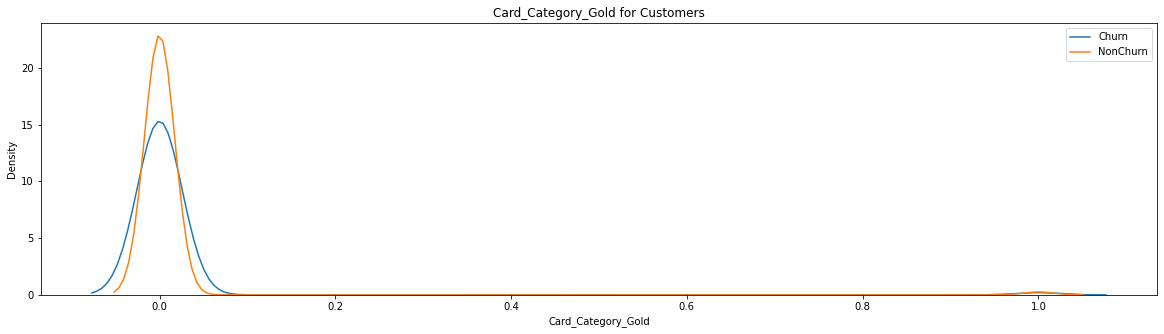

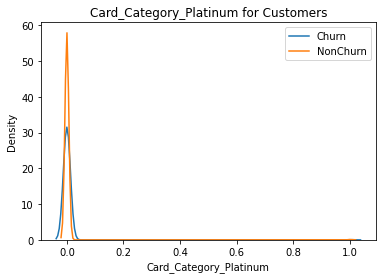

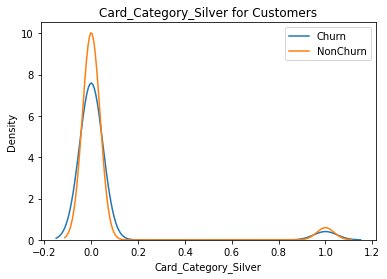

In [168]:
plt.figure(figsize = (20,5))
for i in range(len(Card_Type)):
    sns.distplot(Churn[Card_Type[i]], hist = False, label = 'Churn')
    sns.distplot(NonChurn[Card_Type[i]], hist = False, label  = 'NonChurn')
    plt.title("{} for Customers".format(Card_Type[i]))
    plt.legend()
    plt.show()

Churn Rate for Customers holding Silver Card is 82/1627 =  5% , which is highest among all card types

# Insights Obtained

1.It seems that women customers tend to churn more 

2.Usually customers who remain inactive for more than 3 months have a tendency to churn.

3.Customers who have atmost 3 dependent usually look for other credi card options as they have high expenses.

4.Credit limit for Churn Customers is less than Non Churn Customers

5.Revolving balance is less for Churn Customers and is maintained well

6.Expenditure increases for Q4 when compared with Q1 quarter for Churn Customers

7.Total Transaction amount of Churn Customers is less than Non Churn Customers as credit limit is low

8.Total Transaction count for Churn Customers on an avg is '44' and for Non Churn it '68'.

9.Average Utilization ratio for Churn Customers is less than Non Churn Customers

10.Customers churn is higher for Education_Level_Graduate.

11.Churn Rate of Married Customers is more than Single Customers.Churn Rate is 51% for Married and for Single its 41%

12.Income Catgory Less than '$40K' has churn rate of 49%

13. Churn Rate for Customers holding Silver Card is 5%